# Introduction to Deep Learning

[Deep Learning](https://en.wikipedia.org/wiki/Deep_learning) is a subfield of Machine learning with algorithms inspired by the structure and function of the human brain. 'Deep' in 'deep learning' simply means 'many layers' and it is a specific neural network architecture.  

![](https://cdn-images-1.medium.com/max/1600/1*5egrX--WuyrLA7gBEXdg5A.png)

Changing a typical neural network's architecture by introducing more hidden layers, we are expecting a model that is capable of learning abstract concepts.  

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/04/04085912/dl4.png)

Google's [TensorFlow](https://www.tensorflow.org/), is the most advanced and most commonly used python package for deep learning. TensorFlow is, at its core, a symbolic math library that supports GPU computation.

In [47]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 320.4MB 56kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [48]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

## Terminology

### Tensor

A [tensor](https://en.wikipedia.org/wiki/Tensor) is a mathematical concept, used to model a multi-dimensional array. You may have already accounted such objects, with a [different name](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html) in the past. We can consider a number as a 0-dimensional ("rank-0") tensor, a vector as an 1-dimensional ("rank-1") tensor, a matrix as a 2-dimensional ("rank-2") tensor etc. Tensorflow is using tensors to store information about various parts of a model.


### Computational Graph

A computatioal graph is a way to represent a multi-step computation. Graph vertexes represent the operations and edges the tensors, which can be either the input or output of an operation. 

There are two modes to running TensorFlow:

- eager mode: where operaions are performed during their definition (like in python)
- graph mode: here TensorFlow defines a computation graph and does the computations later, when they are needed.

E.g. when trying to multiply the following tensors:
$output\_tensor = tensor\_1 \cdot tenosr\_2$, TensorFlow creates the graph:
![](https://cdn-images-1.medium.com/max/800/1*mvhm5_r6LY-eHsin21RJTg.png)

TensorFlow in this mode won't execute an action (operation), unless specifically asked to! This was the default way of interacting with TensorFlow until tf2.

### [tf.Tensor](https://www.tensorflow.org/programmers_guide/tensors)

There are two types of tensors in TensorFlow

#### [Constants](https://www.tensorflow.org/api_docs/python/tf/constant)

They are used to store constant variables that will not change during the execution of the program.  

#### [Variables](https://www.tensorflow.org/api_docs/python/tf/Variable)

These are used to store variables that need to be initialized with some values. TensorFlow uses them to store the weight matrices ($W$ and $b$) of the various network layers in tf.Variables.

## Example  

Suppose we want to multiply two integers using TensorFlow.


In [49]:
a = tf.constant(5, name='a')  # initialize 2 tf.constant, the first one with value 5
b = tf.constant(3, name='b')  # the other one with value 3
c = a * b                     # multiply the tensors
print(a, b, c)                # print the results

tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)


### Variables in TensorFlow

Unlike constant variables, variables in TensorFlow can change value. These need to be initialized, either by constant values or by a random generator. This is done like the example that follows:

In [50]:
a = tf.Variable([1, 2])  # define the variables
b = tf.Variable([5, 6])  # and assign initial values

c = a * b
print(c)

tf.Tensor([ 5 12], shape=(2,), dtype=int32)


## Neural Nets in TensorFlow

Neural Networks in TensorFlow are represented as computational graphs. 

As you can imagine it is very hard to define a large neural network in this fashion. Thankfully, there is a high-level API to TensorFlow, called [keras](https://www.tensorflow.org/guide/keras), which has become the default way of creating models in TensorFlow 2.

As per its official page, it offers the following:

>- *User-friendly*  
Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
- *Modular and composable*  
Keras models are made by connecting configurable building blocks together, with few restrictions.
- *Easy to extend*  
Write custom building blocks to express new ideas for research. Create new layers, metrics, loss functions, and develop state-of-the-art models.

### Creation of a simple 1-layer Neural Network

The task we'll be solving is the "hello world" of image classification: *classifying handwritten digits* from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

In [51]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

This dataset contains $70,000$ images with a resolution of $28 \times 28$. Each image represents a single digit from $0-9$, so we have $10$ classes in total.

The computer interprets each image as an array.

![](https://ujwlkarn.files.wordpress.com/2016/08/8-gif.gif?w=192&h=192&zoom=2)

Monochrome images, like these are 2D arrays with a shape of `(height, width)`. For instance our training set `x_train` has a shape of `(60000, 28, 28)`, which can be interpreted as $60,000$, $28 \times 28$ images.

Likewise colored images are represented as a 3D array, with a shape of `(height, width, channels)`. The third dimension is usually $3$ and represents the [RGB channels][1].

Let's inspect one image.

  [1]: https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images

Text(0.5, 1.0, 'Example: 13, Label: 6')

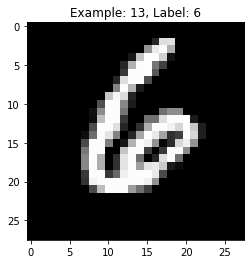

In [52]:
ind = 13
plt.imshow(x_train[ind], cmap='gray')
plt.title('Example: {}, Label: {}'.format(ind, y_train[ind]))

Before we can train a model, we need to one-hot encode the labels. This procedure takes a label, which is a scalar and converts it into a vector with $10$ dimensions, which has nine `0`'s and one `1`. The position of the `1` indicates the label. For instance the label `6` will become `[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]`. 

In [53]:
print('Before: ', y_train.shape, y_test.shape)

y_train = tf.keras.utils.to_categorical(y_train, 10)  # second parameter is the 
y_test = tf.keras.utils.to_categorical(y_test, 10)    # number of classes

print('After:  ', y_train.shape, y_test.shape)

Before:  (60000,) (10000,)
After:   (60000, 10) (10000, 10)


One final thing we'll need to do is to normalize the images. Images are usually represented as integers in the $[0, 255]$ range or as 32-bit floats in the $[0, 1]$ range. We usually prefer the latter so that we can use smaller learning rates and so that the weights don't need to take high values.

In [54]:
print('Before: min(x_train)={}, max(x_train)={}'.format(x_train.min(), x_train.max()))

x_train = x_train / 255.0
x_test = x_test / 255.0

print('After: min(x_train)={}, max(x_train)={}'.format(x_train.min(), x_train.max()))

Before: min(x_train)=0, max(x_train)=255
After: min(x_train)=0.0, max(x_train)=1.0


Now, let's start off with a very simple model. We'll create a simple 1-layer Neural Network (essentially a logistic regressor) to classify the images.

To create a Fully-Connected Nerual Network, we need to use keras' [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers. 

One thing we need to explicitly tell keras, when building the model, is the shape our input and output will have. It doens't care about how many samples we have, rather how many **features** the input has. 

In our case:

- The outputs are the number of classes we want to predict, i.e. **10**
- The inputs are the number of features we have. This is trickier. Since FC NNs require 1D inputs, we need to first **flatten** each image to $28 \times 28 = 784$ pixels. This means our input will be 1D and its size will be **784**.

Keras represents the Neural Network as an object it calls a model. The model has many functions, like `.fit()`, `.predict()`, etc., through which we can use it.

In [55]:
tf.random.set_seed(6)

# Input layer: this has no trainable parameters, but helps keras know the
# shape of the input it will be expecting.
inp = tf.keras.layers.Input(shape=(784,)) 


# Output layer: will be again a Dense layer with 1 neurons and a sigmoid 
# activation. This layer is connected after layer 'inp', i.e. its input is layer
# 'inp's output. Also we'l' use the softmax activation because we have 
# multi-class classification
out = tf.keras.layers.Dense(10, activation='softmax')(inp)

# Define a keras model whose input is layer 'inp' and output is layer 'out'
fc = tf.keras.models.Model(inp, out)

A couple of things to note here:

1. We could have omitted the `Input` layer by adding the parameter `input_shape` to the first `Dense` layer. I prefer to use `Input` layers, though.

2. This is Keras' [**Functional API**](https://www.tensorflow.org/guide/keras/functional). Keras also has an arguably more user-friendly API called [Sequential](https://keras.io/getting-started/sequential-model-guide/). This however is much **more limited** than the functional and so we won't be using it. If we were, our models would look like this:
```python
mlp = tf.keras.models.Sequential([  # define sequential model and add individual
      tf.keras.layers.Input(shape=(784,))  # layers as lists
      tf.keras.layers.Dense(10, activation='softmax')
      ])
# or equivalently
mlp = tf.keras.models.Sequential()  # define an empty Sequential model
mlp.add(tf.keras.layers.Input(shape=(784,)))  # add layers one by one
mlp.add(tf.keras.layers.Dense(10, activation='softmax'))
```  

3. Most people import each object separately when using Keras. This is also Keras' [official recommendataion](https://keras.io/#getting-started-30-seconds-to-keras). This would look like this:
```python
from tf.keras.layers import Input, Dense
from tf.keras.models import Model
inp = Input(shape=(2,))
hid = Dense(3, activation='sigmoid')(inp)
out = Dense(1, activation='sigmoid')(hid)
mlp = Model(inp, out)
```
I prefer not to go back and forth when forgetting to import a layer, so I call everything from `tf`. Another option is how [TensorFlow docs](https://www.tensorflow.org/guide/keras/functional) recommend it:
```python
from tesorflow import keras  # I don't recommend this because it might be
                                # be confused with the original keras package:
                                # https://keras.io/
from tesorflow.keras import layers  # This isn't a bad idea though
inp = layers.Input(shape=(2,))
hid = layers.Dense(3, activation='sigmoid')(inp)
out = layers.Dense(1, activation='sigmoid')(hid)
mlp = keras.Model(inp, out)
```

We can inspect the model's architecture through it's built in `.summary()` method.

In [56]:
fc.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


We can see our Neural Network has $7850$ total parameters.

Next, we need to compile the model. Here we assign an optimizer to train the model and designate the loss function. Optionally we can also define a set of metrics to evaluate our model on.

In [57]:
fc.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

The loss is a categorical **cross-entropy** (basically a cross-entropy loss suited for multi-class labels). The only metric we used is accuracy (i.e. the ratio of correct predictions to total predictions). Note that metrics need to be given in a list even if it's just one. Finally, the optimizer `sgd` stands for **Stochastic Gradient Descent**, one of the simplest optimizers available.

Now all that remains is to train the model. This can be done in just 1 line in keras!

In [58]:
hist = fc.fit(x_train.reshape(-1, 28 * 28), y_train, epochs=20)  # note that input needs reshaping

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7842 - accuracy: 0.8114
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4588 - accuracy: 0.8796
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4047 - accuracy: 0.8900
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8963
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3608 - accuracy: 0.9007
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3487 - accuracy: 0.9031
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3397 - accuracy: 0.9054
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3326 - accuracy: 0.9071
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3267 - accuracy: 0.9089
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.321

The model seems to fluctuare around $91\%$ training accuarcy. We won't know how good it is, though, until we evaluate it on the test set. 

In [59]:
print('Test set accuracy:', fc.evaluate(x_test.reshape(-1, 28 * 28), y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.9190
Test set accuracy: 0.9190000295639038


Test accuracy seems to be as high as the train set. Let's plot the training curves, accessed through the history object that `model.fit` returns.

Text(0, 0.5, 'Accuracy')

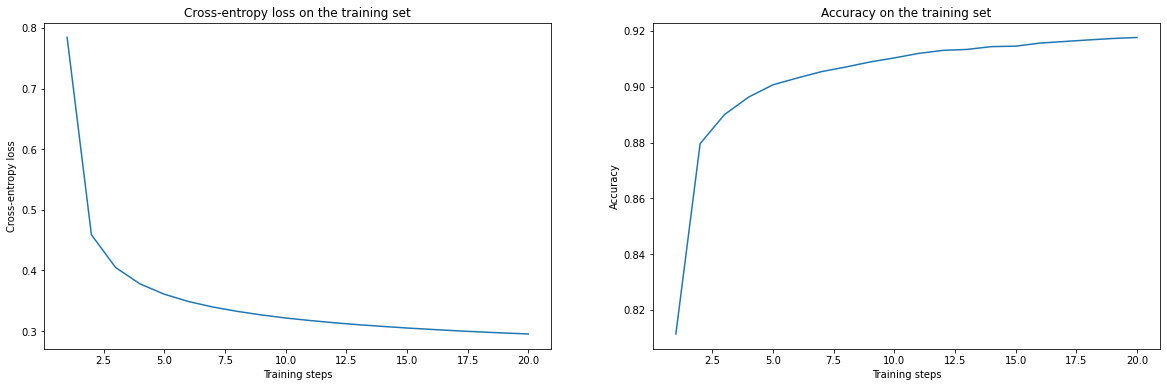

In [60]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 21), hist.history['loss'])
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Training steps')
plt.ylabel('Cross-entropy loss')

plt.subplot(1, 2, 2)
plt.plot(range(1,21), hist.history['accuracy'])
plt.title('Accuracy on the training set')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')

An interesting property of logistic regression, is that because it has a direct mapping from input features to output classes, the weights essentially depict the importance of each input feature towards the final prediction. 

If we rearange these $784 \times 10$ weights to $10$, $28 \times 28$ arrays, we can visualize which pixels mattered the most towards classifying esch of the $10$ classes.

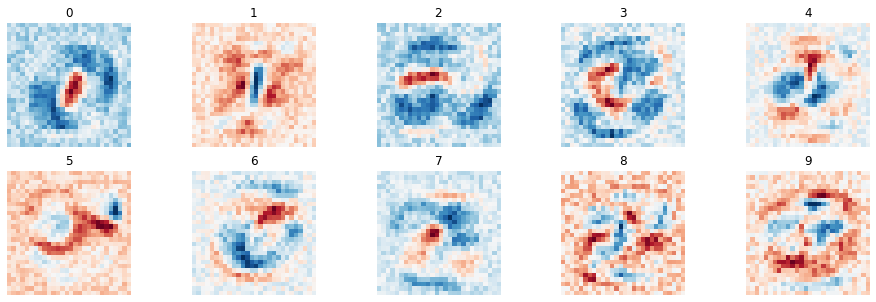

In [61]:
weights = fc.get_weights()[0]  # access the model's weights

plt.figure(figsize=(16, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[:,i].reshape([28,28])
    plt.title(i)
    plt.imshow(weight, cmap='RdBu')
    ax = plt.gca()
    ax.axis('off')

Blue pixels contribute positively towards that prediction while red pixels contribute negatively.

From the above we can begin to understand the reason for this model's high accuracy. Some numbers are, from their nature, easier to detect than others. For example the $0$ is always drawn like a circle with a hole in the middle.

### Multi-Layer Perceptron

Now, let's train an MLP, i.e. a FC NN with a hidden layer

![](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

In [62]:
inp = tf.keras.layers.Input(shape=(28 * 28))
hid = tf.keras.layers.Dense(100, activation='relu')(inp)
out = tf.keras.layers.Dense(10, activation='softmax')(hid)

mlp = tf.keras.models.Model(inp, out, name='MLP')

mlp.compile(optimizer='sgd', loss='categorical_crossentropy', 
                            metrics=['accuracy'])

hist2 = mlp.fit(x_train.reshape(-1, 28 * 28), y_train, epochs=20)

print('Test set accuracy:', mlp.evaluate(x_test.reshape(-1, 28 * 28), y_test)[1])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6513 - accuracy: 0.8361
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3363 - accuracy: 0.9069
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2902 - accuracy: 0.9181
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9262
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9327
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2208 - accuracy: 0.9382
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2057 - accuracy: 0.9422
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1923 - accuracy: 0.9461
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1808 - accuracy: 0.9489
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.170

Text(0, 0.5, 'Accuracy')

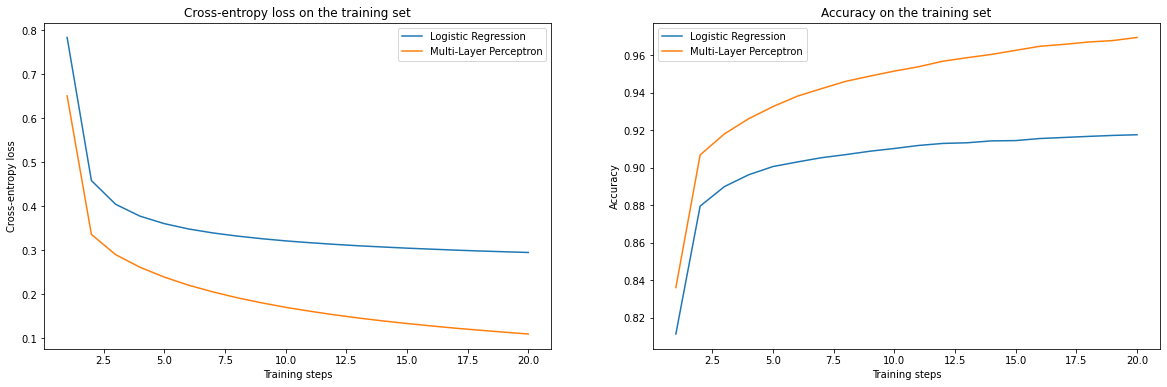

In [63]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 21), hist.history['loss'], label='Logistic Regression')
plt.plot(range(1, 21), hist2.history['loss'], label='Multi-Layer Perceptron')
plt.legend()
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Training steps')
plt.ylabel('Cross-entropy loss')

plt.subplot(1, 2, 2)
plt.plot(range(1,21), hist.history['accuracy'], label='Logistic Regression')
plt.plot(range(1,21), hist2.history['accuracy'], label='Multi-Layer Perceptron')
plt.legend()
plt.title('Accuracy on the training set')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')

This model did a bit better than the last time, however the model took a bit more time to train. Because the MLP does not have a direct mapping from input to output (instead the hidden layer comes in between), we cannot visualize the impact each input pixel has towards the final prediction.

### Training on Batches

Unfortunately the MNIST dataset isn't very indicative of an actual image classification problem, due to its small size. Most datasets range from hundreds of thousands to millions of images, while having a higher resolution. 
In most cases image datasets won't fit in memory to store as a numpy array (e.g. like we have `x_train` here), but will have to be loaded from the disk a few at a time. Even if they could be stored in memory, it wouldn't be effective for a model to see all of the images in order to calculate the total loss and compute the gradient. 

The solution is that the model just processes a small subset of the training set at each step and updates its parameters according to this. This subset is referred to as a **batch**. This leads to a variation of Gradient Descent, called [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), which is what **SGD** stands for (i.e. the optimizer that we've been using).

By Machine Learning terminology:

- an **iteration** is a single training step where the model generates predictions for a batch of samples, estimates their loss, computes the gradient of this loss with respect to the parameters and updates them accordingly.

- an **epoch** is the time at which the model has seen all samples in the training set. 

For example if we used a batch size of $200$ (i.e. each batch consists of $200$ images), this would mean that the training set would be split into $60,000 / 200 = 3,000$ batches. Consequently, an epoch would consist of $3,000$ iterations. 

In regular Gradient Descent, since the model is trained on the whole training set, the batch size would be equal to the training set size and an iteration would be the same as an epoch. 

The tradeoff between SGD and regular GD is that the first requires much more training steps to converge, but each step is much quicker. Additionally, since each batch's loss is only an approximation of the training set's loss, the parameters might be updated in a direction that isn't globally optimal. While this sounds like a bad thing, it could be actually beneficial because it allows exploring a larger area in the parameter space, which could help get over local minima or reduce overfitting.

After each epoch the training set is shuffled so that we get different samples in each batch. This whole procedure is done seemlessly in the `model.fit()` function, whoever we'll see how to tweak it in a future tutorial.

For the time being we can control the batch size (and consequently the number of iterations per epoch) through the `batch_size` parameter in the `.fit()` method.

The type of Neural Network we've been using up till now is called a **Fully Connected (FC)** Neural Network, because for each layer, every one of its inputs are connected to all of its outputs.

## Convolutional Neural Networks

Convolutional Neural Networks (CNNs), are another type of Neural Networks, very popular when dealing with images. These networks employ **weight sharing** and **sparse connecticity** to reduce the number of parameters in each layer, allowing for the creation of deep networks. 

There are three main layers that are used in CNNs: convolutional, pooling and fully connected.

### Convolutional Layer

*Note: since we're dealing with images we'll be examining 2D convolution layers, but there are also 1D layers (e.g. for sequential data) and 3D layers (e.g. for volumetric data).*

*Note2: Also it's important to point out that the input of these 2D layers is a 2D array. This means that the image is passed to the layer in its original form and not flattened as we did before. This allows the layers to exploit the spatial structure of the images to extract features.*

#### Operation

A convolutional layer performs a 2D convolution operation on the input. We won't look into the [mathematical definition](https://en.wikipedia.org/wiki/Convolution) of this operation, rather how it affects an input image. Say we have the following $5 \times 5$ image:

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-13-pm.png?w=254&h=230)

Additionally we have a $3 \times 3$ filter:

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=148&h=128)

The 2D convolution operation between these two is equivalent to passing the filter through the image and multiplying the two elementwise at each position to generate each element of the output. 

![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2)

The output of the convolution is called a **feature map**. Different filters (or **kernels** as they're more commonly called) have [different effects][1] on the input image. A nice example for the effect different kernels can have can be found [here](http://setosa.io/ev/image-kernels/).

[1]: https://en.wikipedia.org/wiki/Kernel_(image_processing)

In a convolution layer, the values of the filter are **trainable parameters**. The idea is that the network will learn to extract whatever features it deems necessary from the images.

One more interesting thing to note is that the dimensions of the feature maps shrank a bit compared to the input image. This is to be expected due to the number of total positions in the input image that the filter can be placed in. 

#### Implementation Details

There are 4 main hyperparameters with which we can affect the befaviour of a convolution layer:

- Kernel **size** (i.e. the size of the filters). In the previous example we used $3 \times 3$ filters.
- The **number** of filters in a given layer (e.g. in the example we set 3 filters). Think of this as the size of the layer (it is equivalent to the number of neurons in a FC layer).
- The filter's **strides**. In the previous example we moved the filter by 1 pixel at each time. This isn't necessary always; we can make the filter move by more than 1 pixels at a time.  
 *Note: this will reduce the size of the output feature maps*.
- We can even allow the filter to go *outside* of the input image, so that the feature maps have the same size as the input image. This technique is called **padding**, because we need to *pad* the input image with some value to allow the filter to work on the the image's edges. There are a few types of padding like *zero padding* which pads the images with zeros (sometimes referred to as *same padding*) and not using any padding is commonly referred to as *valid padding*.

Additionally to these, in a convolutional layer we have the same hyperparameters as in a regular FC layer, e.g. the activation fucntion, the choice to use a bias or not and the weight initialization. The [ReLU][2] is the most common activation function used, while biases have proven to be not that necessary (a lot of popular architectures don't utilize biases).

#### Comparison to Fully Connected Layers

The major advantage of a convolutional layer compared to a FC one is that it has a lot less parameters. In the previous example we had an input image of $28 \times 28 = 784$ pixels and the output of that *layer* was $3$ feature maps of $26 \times 26$ pixels, for a total of $2,028$ pixels. In a FC layer, if we wanted the same dimensions we'd need to have $784 \times 2,028 = 1,589,952‬$ parameters. How many did we need in the example? Just $27$!


[2]: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)


### Pooling Layers

*Note: Again we'll be referring to 2D pooling layers*.

A pooling layer decreases the size of its input through some sort of spatial subsampling. Pooling layers again have a sort of filter that slides through the input image and performs some operation at each position. Depending on the operation performed, we have different types of pooling layers (e.g. max, sum, average). The difference between this and convolution layers is that here the inputs are **not** transformed with a linear transformation, but **described** in some way. This means that pooling layers have **no trainable parameters**. 

For example, the most common type is **max pooling**.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=500)

In this operation the filter does keeps the maximum of each position in the input image. 

#### Implementation details

We are faced with some of the same design choices here as we were with convolutions. Pooling layers have:

- **size**: in the above example they're $2 \times $2.
- **strides**: again above we have strides of $2$ both horizontally and vertically.
- **padding**: above we used "valid" pading (i.e. no padding).

Note that the two pooled images are drastically subsampled (one fourth of the original pixels).

#### Why use pooling layers?

There are several reasons often cited as to why pooling layers are beneficial:

- They subsample their input which can lead to the **reduction** of a network's parameters.
- They provide some form of **invariance** to small changes in the input.
- They make the representation independent of scale (**equivariance**).

On the other hand, more and more CNNs are beginning to dump pooling layers altogether in favor of subsampling through convolution layers with a stride larger than $1$, so they may not be so necessary.

### Making predictions

Convolution and pooling layers are good for **extracting features** from the images. However, we still need a way to generate predictions based on these features. The solution is to add a FC layer at the end of the network, to classify images (or any other task).

Now we can put it all together and create our first CNN.

In [64]:
# Input layer
# Note: we are passing each image as a 3D array: (height, width, channels)
# So the actual input of the CNN will be 4D: (batch size, height, width, channels)
inp = tf.keras.layers.Input((28, 28, 1))

# First convolutional layer:
# 32 filters, a kernel size of 6x6, strides of 1, zero (same) padding and ReLU activated
c1 = tf.keras.layers.Conv2D(8, kernel_size=(6, 6), activation='relu', padding='same')(inp)

# Second convolutional layer:
# 64 filters, a kernel size of 6x6, strides of 1, zero padding and ReLU activated
c2 = tf.keras.layers.Conv2D(16, kernel_size=(6, 6), activation='relu', padding='same')(c1)

# First max pooling layer:
# A kernel size of 2x2, strides of 2 and zero padding
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(c2)

# Third convolutional layer:
# 128 filters, a kernel size of 4x4, strides of 1, same padding and ReLU activated
c3 = tf.keras.layers.Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(p1)

# Fourth convolutional layer:
# 256 filters, a kernel size of 4x4, strides of 1, same padding and ReLU activated
c4 = tf.keras.layers.Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same')(c3)

# Second pooling layer:
# A kernel size of 2x2, strides of 2 and zero padding
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(c4)

# Flatten layer:
# This is used to convert the 3D input to a 1D vector, required by the FC layers  
fl = tf.keras.layers.Flatten()(p2)

# Fully Connected layer:
# Output layer of the model, same as we had with the MLP
out = tf.keras.layers.Dense(10, activation='softmax')(fl)

cnn = tf.keras.models.Model(inputs=inp, outputs=out, name='CNN')

# Store the weights so that we can re-initialize the model later
weights = cnn.get_weights()

cnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
h = cnn.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size=256)

print('Test set accuracy:', cnn.evaluate(x_test[..., np.newaxis], y_test)[1])

Epoch 1/20
235/235 [==============================] - 3s 13ms/step - loss: 1.9938 - accuracy: 0.4087
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.3910 - accuracy: 0.8813
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.2127 - accuracy: 0.9374
Epoch 4/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1582 - accuracy: 0.9528
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1272 - accuracy: 0.9629
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1092 - accuracy: 0.9677
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0969 - accuracy: 0.9709
Epoch 8/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0880 - accuracy: 0.9734
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0821 - accuracy: 0.9753
Epoch 10/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0750 - accura

The CNN was chosen strategically so that it has around the same number of parameters that the MLP did. This can be easily confirmed.

In [65]:
cnn.summary()
print()
mlp.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         296       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0       

Text(0, 0.5, 'Accuracy')

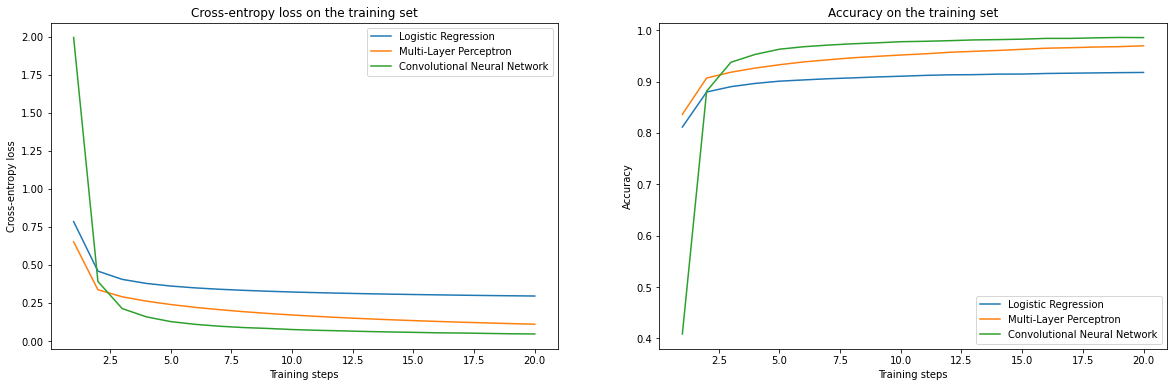

In [66]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 21), hist.history['loss'], label='Logistic Regression')
plt.plot(range(1, 21), hist2.history['loss'], label='Multi-Layer Perceptron')
plt.plot(range(1,21), h.history['loss'], label='Convolutional Neural Network')
plt.legend()
plt.title('Cross-entropy loss on the training set')
plt.xlabel('Training steps')
plt.ylabel('Cross-entropy loss')

plt.subplot(1, 2, 2)
plt.plot(range(1,21), hist.history['accuracy'], label='Logistic Regression')
plt.plot(range(1,21), hist2.history['accuracy'], label='Multi-Layer Perceptron')
plt.plot(range(1,21), h.history['accuracy'], label='Convolutional Neural Network')
plt.legend()
plt.title('Accuracy on the training set')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')

So, convolution layers make it so we can create **much deeper** networks, with the same number of parameters. This leads to the extraction of higher-level features from the input images, which in turn allows for the creation of much more effective image classifiers.

This can be seen by the elevated performance.

### Keras Callbacks

One of the main draws to keras is its simple interface for training models: `model.fit()`. This abstracts the training loop into a simple method, which offers a very skleran-like feel to training even complex Deep Neural Networks. While simplicity is always welcome, it is through our **loss of control** over the training process.

Besides the default `History` callback there are a lot more available. Some other examples of popular callbacks are [`ModelCheckpoint`](https://keras.io/callbacks/#modelcheckpoint), [`EarlyStopping`](https://keras.io/callbacks/#earlystopping), [`LearningRateScheduler`](https://keras.io/callbacks/#learningratescheduler) and [`ReduceLROnPlateau`](https://keras.io/callbacks/#reducelronplateau).

These four callbacks are very useful to know, so we'll see them in more detail:

`ModelCheckpoint` is used to store the model every $x$ epochs. The cool thing with this callback is that we can set it to monitor a metric (even a validation one) and save the weights only if they are better than the previous stored.

This ensures that the weights we have stored are actually the best and will help combat overfitting if set to monitor a validation metric

`EarlyStopping` again monitors a metric and terminates the training loop when that monitor stops improving. What *stops improving* actually means and over how many epochs does it need to not improve to terminate is up to us.

`LearningRateScheduler` allows us to change the learing rate based on a predefined schedule.

`ReduceLROnPlateau` again monitors a certain metric and when that metric stops improving, it reduces the learning rate.


In [67]:
# Model Checkpoint
chp = tf.keras.callbacks.ModelCheckpoint('best_weights_cnn.h5', 
                                         monitor='val_accuracy', 
                                         save_best_only=True)
# first parameter is the path to the file we want the weights to be stored
# we want to monitor the validation accuracy, i.e. 'val_accuracy'.
# we want to store the weights only if they are better than the previously-stored weights 

# Reduce LR on Plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                                 patience=3, cooldown=1,
                                                 min_delta=0.01, verbose=1)
# we'll monitor the validation loss for theis callback
# if it stagnates for 3 epochs (i.e. 'patience=3')
# it will be reduced by halp (i.e. 'factor=0.5')
# then it will have to wait an epoch for normal operation to resume (i.e. 'cooldown=1')
# 'min_delta=0.01' means that if the loss doesn't drop by more than 0.01 trigger the reduction
# finally, we'll add a verbosity to see when the reduction is triggered

# Restore the initial weights of the model and compile it again
cnn.set_weights(weights)
cnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again from scratch
h = cnn.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size=256, 
            callbacks=[chp, reduce_lr], validation_data=(x_test[..., np.newaxis], y_test))

print('Test set accuracy:', cnn.evaluate(x_test[..., np.newaxis], y_test)[1])

Epoch 1/20
235/235 [==============================] - 3s 15ms/step - loss: 1.9938 - accuracy: 0.4088 - val_loss: 0.7728 - val_accuracy: 0.7770
Epoch 2/20
235/235 [==============================] - 3s 14ms/step - loss: 0.3911 - accuracy: 0.8811 - val_loss: 0.2455 - val_accuracy: 0.9292
Epoch 3/20
235/235 [==============================] - 3s 14ms/step - loss: 0.2128 - accuracy: 0.9374 - val_loss: 0.1647 - val_accuracy: 0.9519
Epoch 4/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1582 - accuracy: 0.9527 - val_loss: 0.1288 - val_accuracy: 0.9599
Epoch 5/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1273 - accuracy: 0.9628 - val_loss: 0.1022 - val_accuracy: 0.9677
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.1092 - accuracy: 0.9676 - val_loss: 0.1842 - val_accuracy: 0.9347
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0969 - accuracy: 0.9710 - val_loss: 0.1199 - val_accuracy: 0.9607